In [1]:
# Import necesary libraries
import yfinance as yf


# Download historical data for required stocks
tickers = ["MSFT","AAPL","GOOG"]
ohlcv_data = {}


# looping over tickers and storing OHLCV dataframe in dictionary
for ticker in tickers:
    temp = yf.download(ticker,period='1mo',interval='15m')
    temp.dropna(how="any",inplace=True)
    ohlcv_data[ticker] = temp


def MACD(DF, a=12 ,b=26, c=9):
    """function to calculate MACD
      typical values a(fast moving average) = 12;
                     b(slow moving average) =26;
                     c(signal line ma window) =9
    """
   
    df = DF.copy()
    df["ma_fast"] = df["Adj Close"].ewm(span=a, min_periods=a).mean()
    df["ma_slow"] = df["Adj Close"].ewm(span=b, min_periods=b).mean()
    df["macd"] = df["ma_fast"] - df["ma_slow"]
    df["signal"] = df["macd"].ewm(span=c, min_periods=c).mean()
    return df.loc[:,["macd","signal"]]


for ticker in ohlcv_data:
    ohlcv_data[ticker][["MACD","SIGNAL"]] = MACD(ohlcv_data[ticker], a=12 ,b=26, c=9)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [16]:
ohlcv_data['MSFT']

,Open,High,Low,Close,Adj Close,Volume,MACD,SIGNAL
Datetime,,,,,,,,
2023-05-15 09:30:00,309.095001,309.279999,307.640015,308.949402,308.949402,2101279,NaN,NaN
2023-05-15 09:45:00,308.950012,309.499512,308.130005,308.790009,308.790009,821417,NaN,NaN
2023-05-15 10:00:00,308.829987,309.380005,307.899994,308.160004,308.160004,715040,NaN,NaN
2023-05-15 10:15:00,308.140015,308.649994,307.654999,307.679993,307.679993,576367,NaN,NaN
2023-05-15 10:30:00,307.660004,309.488403,307.589996,309.339996,309.339996,742222,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-06-12 14:45:00,329.739990,330.769989,329.579987,330.660004,330.660004,683436,0.771942,0.492178
2023-06-12 15:00:00,330.660004,331.869995,330.429993,331.695007,331.695007,877507,0.932392,0.580221
2023-06-12 15:15:00,331.709991,332.099915,330.739990,331.040009,331.040009,929509,0.995224,0.663222


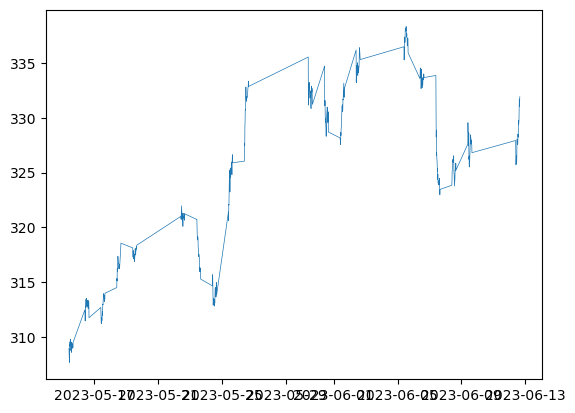

In [20]:
import matplotlib.pyplot as plt

plt.plot(ohlcv_data['MSFT']['Adj Close'], linewidth=0.5)

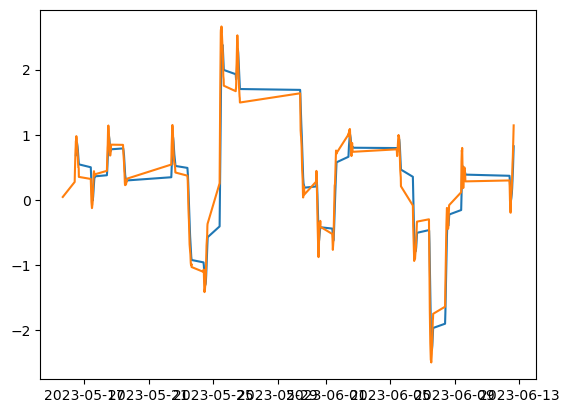

In [22]:
plt.plot(ohlcv_data['MSFT']['SIGNAL'])
plt.plot(ohlcv_data['MSFT']['MACD'])